**Lending Club Loan Data Analysis ** **by Thato Tladi**

Course-end Project 3

**Description**

Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement: **

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

**Tasks:**
1. Feature Transformation
Transform categorical values into numerical values (discrete)
2. Exploratory data analysis of different factors of the dataset.
3. Additional Feature Engineering
You will check the correlation between features and will drop those features which have a strong correlation
This will help reduce the number of features and will leave you with the most relevant features
4. Modeling
After applying EDA and feature engineering, you are now ready to build the predictive models
In this part, you will create a deep learning model using Keras with Tensorflow backend


In [1]:

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load


%matplotlib inline

In [2]:
#loading dataset
df = pd.read_csv('loan_data.csv')


In [3]:
#checking data head
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
#checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
#Verying columns
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
#checking data shape
df.shape

(9578, 14)

In [8]:
#statistical info
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [9]:
#proportion of missing values
df['not.fully.paid'].isnull().mean()

0.0

In [10]:
#
df1=pd.get_dummies(df, columns=['purpose'])

In [11]:
df1['log.annual.inc'] = np.exp(df1['log.annual.inc'])

In [12]:
df1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,85000.000385,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,65000.000073,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,31999.999943,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,85000.000385,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,80799.999636,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [13]:
df.groupby('not.fully.paid')['not.fully.paid'].count()/len(df)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<Axes: xlabel='not.fully.paid', ylabel='count'>

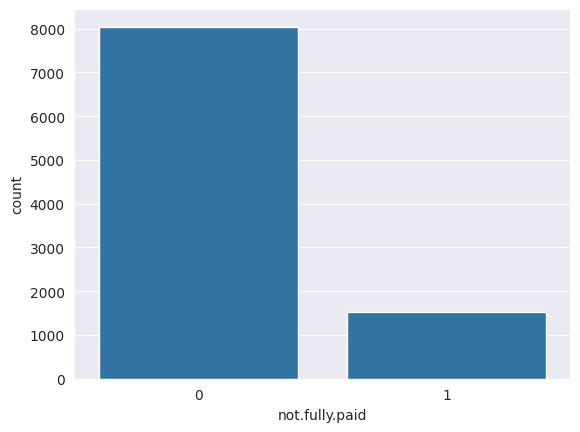

In [14]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df)

The plot above shows this dataset is highly imbalanced.

*Using Oversampling approach to balance the dataset*

In [16]:
count_class_0, count_class_1 = df['not.fully.paid'].value_counts()

In [17]:
df_0 = df[df['not.fully.paid'] == 0]
df_1 = df[df['not.fully.paid'] == 1]

In [18]:
df_1_over = df_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_0, df_1_over], axis=0)

In [19]:
print('Random over-sampling:')
print(df_test_over['not.fully.paid'].value_counts())

Random over-sampling:
not.fully.paid
0    8045
1    8045
Name: count, dtype: int64


<Axes: xlabel='not.fully.paid', ylabel='count'>

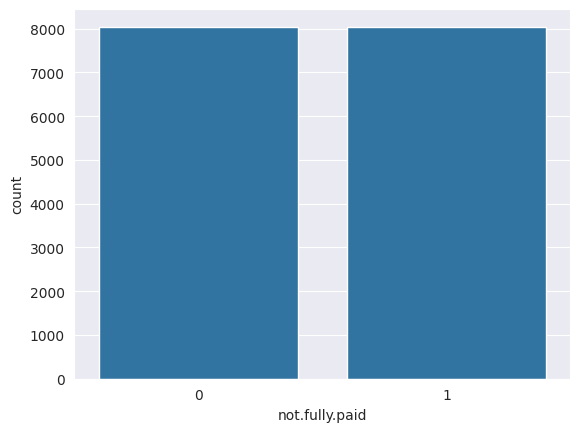

In [20]:
#df_test_over['not.fully.paid'].value_counts().plot(kind='bar', title='Count (not.fully.paid)')

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=df_test_over)

Plot shows dataset is now balanced

**Exploratory Data Analysis**

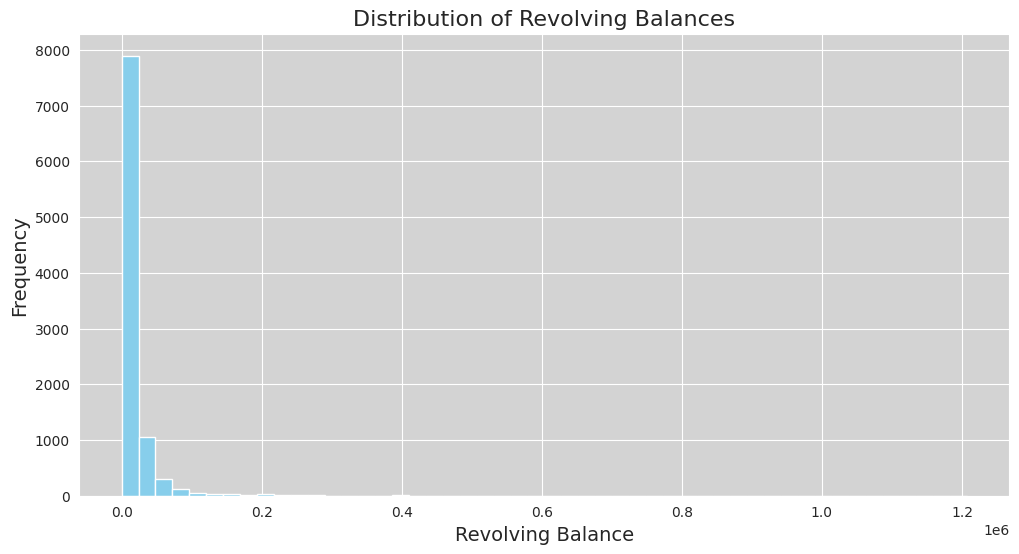

In [23]:

plt.figure(figsize=[12, 6])
# Plot histogram with customizations
df['revol.bal'].hist(color='skyblue', bins=50)
# Add labels and title
plt.xlabel('Revolving Balance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Revolving Balances', fontsize=16)
# Add gridlines
plt.grid(True)
# Set background color to grey
plt.gca().set_facecolor('lightgrey')
# Display the plot
plt.show()

In [24]:
df1=pd.get_dummies(df, columns=['purpose'])

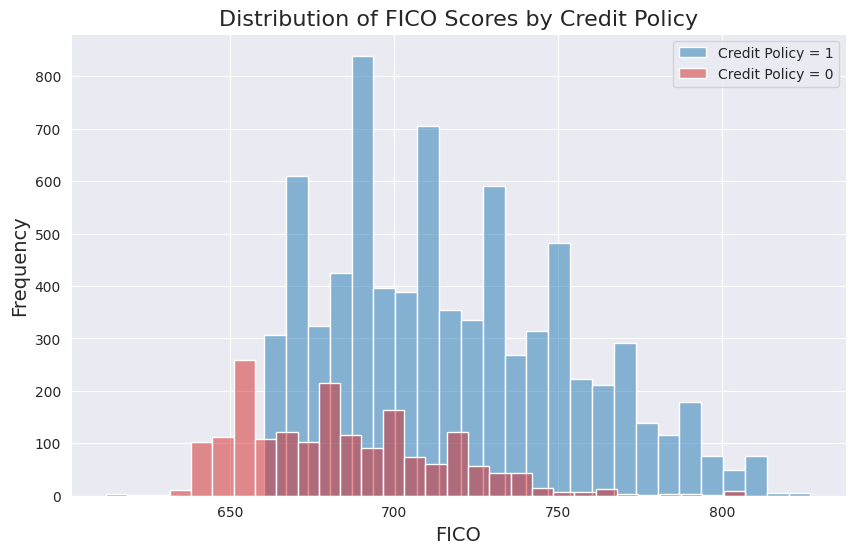

In [26]:
plt.figure(figsize=(10, 6))
# Define custom color palette
colors = ["#1f77b4", "#d62728"]  # Blue for 'credit policy 1', red for 'credit policy 0'
# Plot histograms with custom colors
sns.histplot(df[df['credit.policy'] == 1]['fico'], alpha=0.5, bins=30, color=colors[0], label='Credit Policy = 1')
sns.histplot(df[df['credit.policy'] == 0]['fico'], alpha=0.5, bins=30, color=colors[1], label='Credit Policy = 0')
# Add legend and labels
plt.legend()
plt.xlabel('FICO', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of FICO Scores by Credit Policy', fontsize=16)
# Show plot
plt.show()

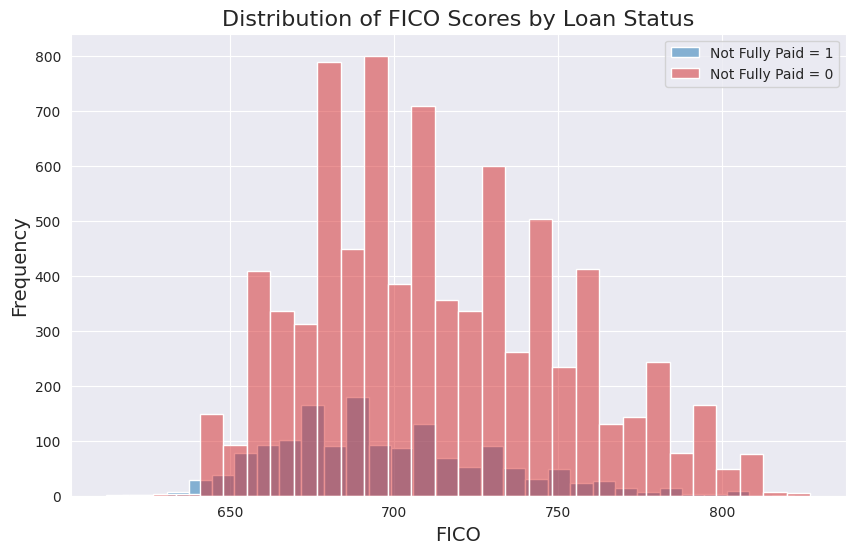

In [28]:
plt.figure(figsize=(10, 6))
# Define custom color palette
colors = ["#1f77b4", "#d62728"]  # Blue for 'not fully paid 1', red for 'not fully paid 0'
# Plot histograms with custom colors
sns.histplot(df[df['not.fully.paid'] == 1]['fico'], alpha=0.5, bins=30, color=colors[0], label='Not Fully Paid = 1')
sns.histplot(df[df['not.fully.paid'] == 0]['fico'], alpha=0.5, bins=30, color=colors[1], label='Not Fully Paid = 0')
# Add legend and labels
plt.legend()
plt.xlabel('FICO', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of FICO Scores by Loan Status', fontsize=16)
# Show plot
plt.show()

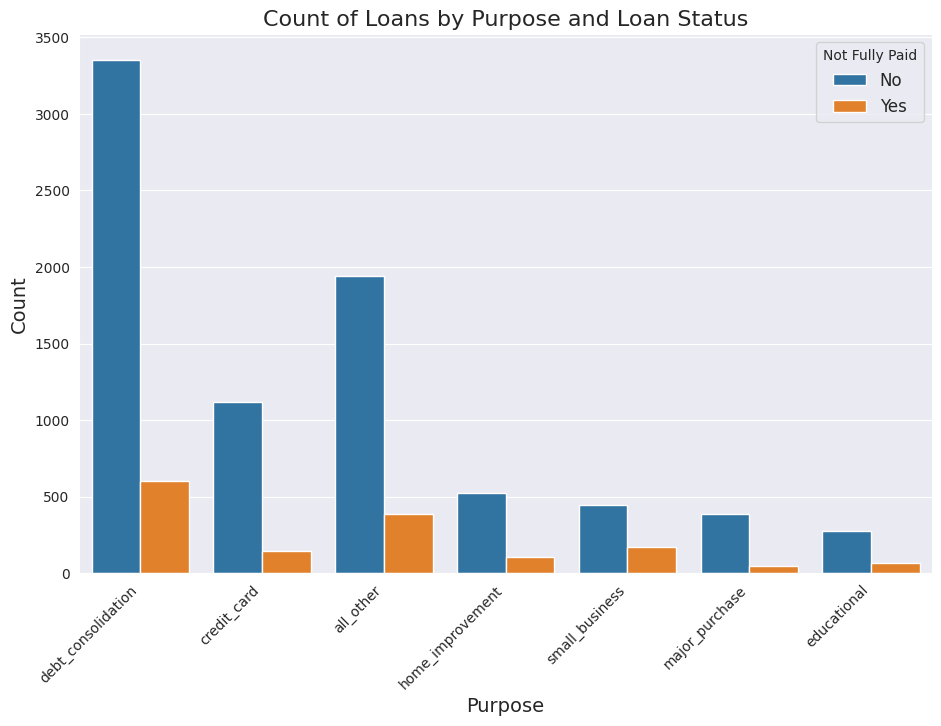

In [32]:
plt.figure(figsize=(11, 7))
# Define custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]  # Blue for 'fully paid', orange for 'not fully paid'
# Plot countplot with custom color palette
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette=custom_palette)
# Add legend and labels
plt.legend(title='Not Fully Paid', labels=['No', 'Yes'], fontsize=12)
plt.xlabel('Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Loans by Purpose and Loan Status', fontsize=16)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Show plot
plt.show()

Trend between FICO score and interest rate.

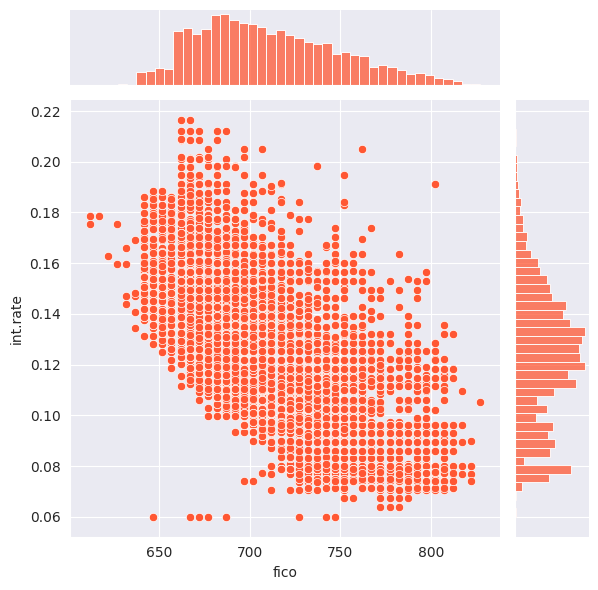

In [34]:
# Define custom color
custom_color = "#FF5733"  # Orange-red color
# Plot jointplot with custom color
sns.jointplot(x='fico', y='int.rate', data=df, color=custom_color)
# Show plot
plt.show()

Comparing the trend between not.fully.paid and credit.policy

<Figure size 1100x700 with 0 Axes>

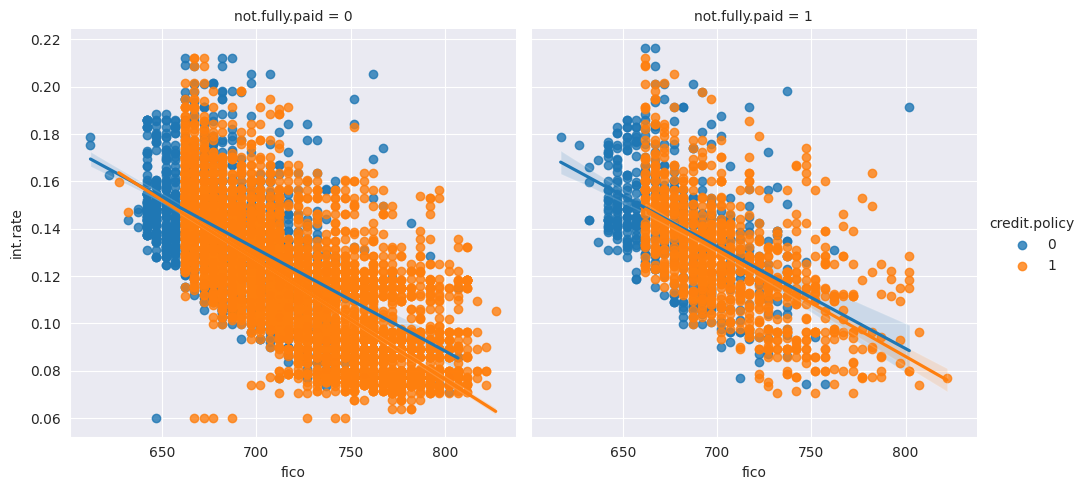

In [36]:
plt.figure(figsize=(11, 7))
# Define custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]  # Blue for 'credit policy 1', orange for 'credit policy 0'
# Plot lmplot with custom color palette
sns.lmplot(y='int.rate', x='fico', data=df, hue='credit.policy', col='not.fully.paid', palette=custom_palette)
# Show plot
plt.show()

In [37]:
cat_feats = ['purpose']
#cat_feats =df_test_over

In [38]:
#final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data = pd.get_dummies(df_test_over,columns=cat_feats,drop_first=True)

In [39]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16090 entries, 0 to 9168
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         16090 non

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [40]:
final_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.293307,0.054640,0.015233,-0.100002,0.375445,0.093294,-0.195852,-0.099267,-0.543976,-0.057024,-0.060886,-0.204004,-0.003451,0.030923,-0.027396,-0.013367,0.038187,0.005608
int.rate,-0.293307,1.000000,0.278189,0.084073,0.216350,-0.680607,-0.088866,0.092401,0.416130,0.177614,0.151214,0.102938,0.216851,-0.037207,0.091180,-0.011997,-0.042956,-0.063104,0.172527
installment,0.054640,0.278189,1.000000,0.468074,0.024560,0.106589,0.182262,0.249130,0.044233,-0.019721,0.006644,-0.014513,0.061509,-0.001608,0.120068,-0.094194,0.027896,-0.042785,0.186539
log.annual.inc,0.015233,0.084073,0.468074,1.000000,-0.030976,0.103173,0.353339,0.400856,0.070744,0.040748,0.018934,0.014799,-0.046827,0.065649,-0.026501,-0.122233,0.106329,-0.021422,0.117499
dti,-0.100002,0.216350,0.024560,-0.030976,1.000000,-0.230083,0.092904,0.185282,0.332305,0.030601,-0.037275,0.023293,0.051438,0.075008,0.191180,-0.029502,-0.099599,-0.082615,-0.059445
fico,0.375445,-0.680607,0.106589,0.103173,-0.230083,1.000000,0.247852,0.006925,-0.497563,-0.188257,-0.210286,-0.154301,-0.204996,-0.015966,-0.145084,-0.020339,0.088097,0.059450,0.081931
days.with.cr.line,0.093294,-0.088866,0.182262,0.353339,0.092904,0.247852,1.000000,0.274217,0.015387,-0.025762,0.082814,0.068572,-0.039680,0.051009,-0.004032,-0.045427,0.066779,-0.026191,0.041953
revol.bal,-0.195852,0.092401,0.249130,0.400856,0.185282,0.006925,0.274217,1.000000,0.173566,0.023958,-0.031442,-0.032100,0.061750,0.054039,-0.014264,-0.036296,-0.008855,-0.058081,0.112905
revol.util,-0.099267,0.416130,0.044233,0.070744,0.332305,-0.497563,0.015387,0.173566,1.000000,-0.025884,-0.047520,0.073072,0.100440,0.090525,0.201880,-0.041457,-0.113380,-0.117610,-0.057804
inq.last.6mths,-0.543976,0.177614,-0.019721,0.040748,0.030601,-0.188257,-0.025762,0.023958,-0.025884,1.000000,-0.004713,0.105382,0.174974,-0.034921,-0.049479,0.022866,0.077996,-0.006090,0.019452


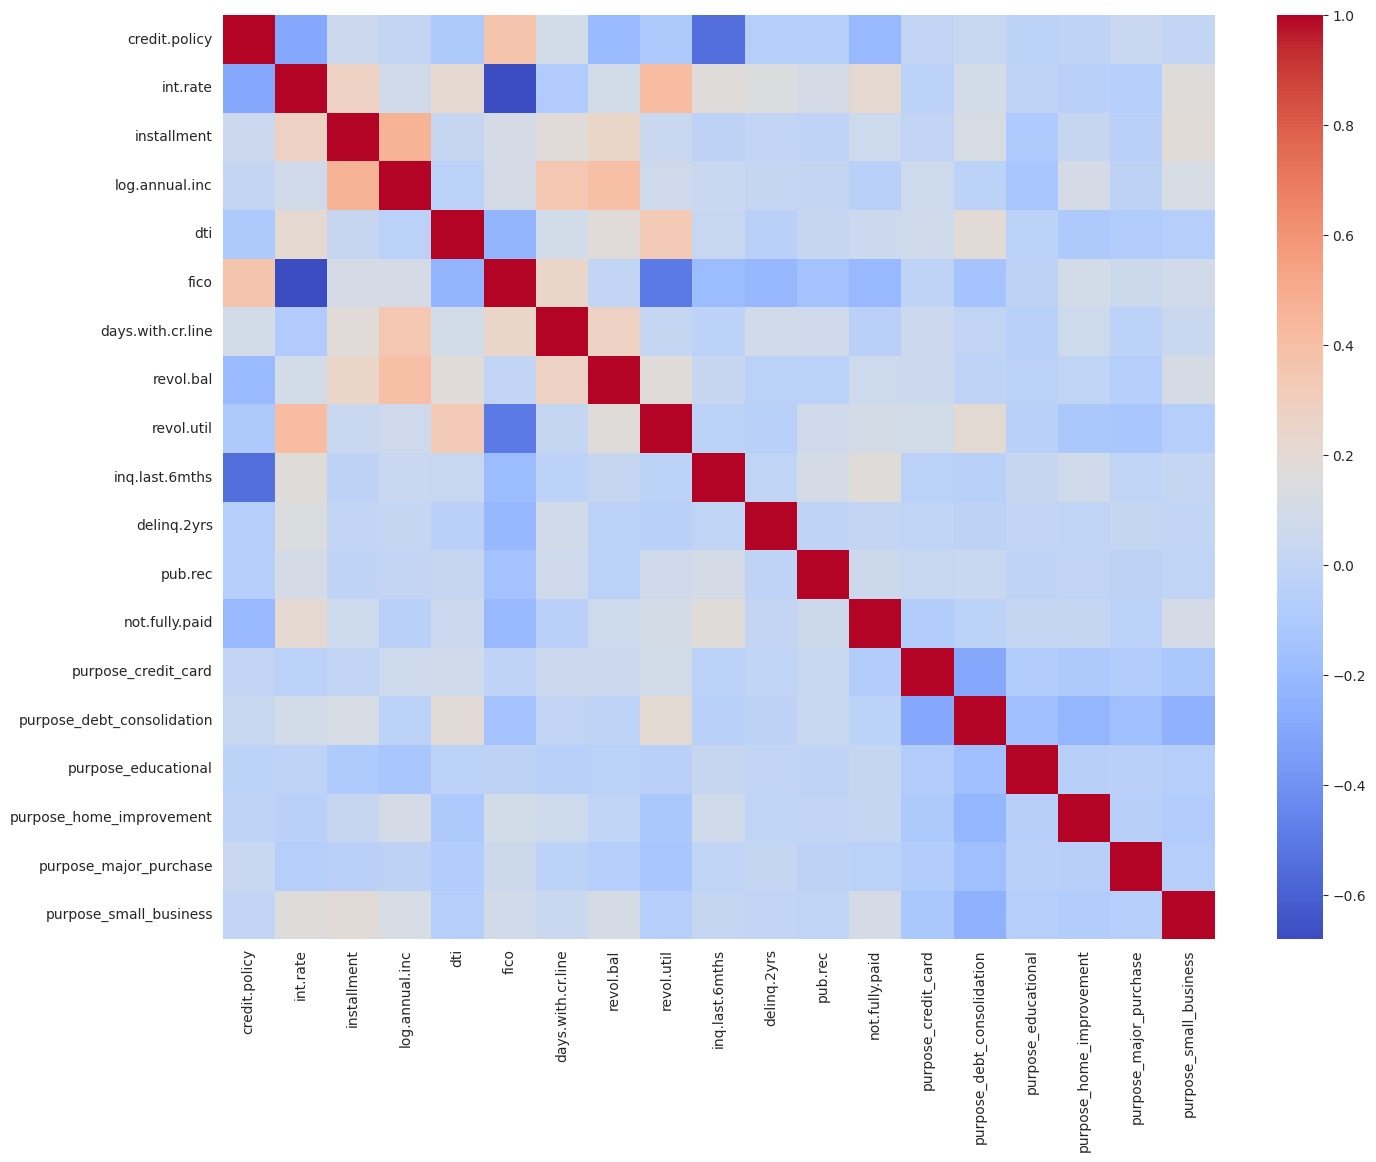

In [42]:
plt.figure(figsize=[16, 12])
# Define custom color palette
custom_palette = "coolwarm"
# Plot heatmap with custom color palette
sns.heatmap(data=final_data.corr(), cmap=custom_palette, annot=False, fmt='.2g')
# Show plot
plt.show()

In [43]:
to_drop2 = ['revol.bal', 'days.with.cr.line', 'installment', 'revol.bal']

final_data.drop(to_drop2, axis=1, inplace=True)
#We only focus on the grids of yellow or very light green. After comparing with the feature description again,  revol.bal,day.with.cr.line,installment can repsent by annual income. revol.util can repsent by int.rate,

In [44]:
final_data.isnull().mean()

credit.policy                 0.0
int.rate                      0.0
log.annual.inc                0.0
dti                           0.0
fico                          0.0
revol.util                    0.0
inq.last.6mths                0.0
delinq.2yrs                   0.0
pub.rec                       0.0
not.fully.paid                0.0
purpose_credit_card           0.0
purpose_debt_consolidation    0.0
purpose_educational           0.0
purpose_home_improvement      0.0
purpose_major_purchase        0.0
purpose_small_business        0.0
dtype: float64

**Modeling-Deep Learning Implementation**

In [45]:
#to_train = df1[df1['not.fully.paid'].isin([0,1])]
#to_pred = df1[df1['not.fully.paid'] == 2]

to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

In [46]:
X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [47]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train.shape

(11263, 15)

In [50]:
model = Sequential()

model.add(
        Dense(94, activation='relu')
)

model.add(
        Dense(30, activation='relu')
)

model.add(
        Dense(15, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)

model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
)

In [51]:
early_stop = EarlyStopping(
        monitor='val_loss',
        mode='min',
        verbose=1,
        patience=25
)

model.fit(
        X_train,
        y_train,
        epochs=200,
        batch_size=256,
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 2s 10ms/step - loss: 0.6691 - accuracy: 0.6104 - val_loss: 0.6528 - val_accuracy: 0.6178
Epoch 2/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6482 - accuracy: 0.6204 - val_loss: 0.6477 - val_accuracy: 0.6190
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6445 - accuracy: 0.6201 - val_loss: 0.6475 - val_accuracy: 0.6207
Epoch 4/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6265 - val_loss: 0.6462 - val_accuracy: 0.6174
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6404 - accuracy: 0.6245 - val_loss: 0.6440 - val_accuracy: 0.6236
Epoch 6/200
44/44 [==============================] - 0s 3ms/step - loss: 0.6384 - accuracy: 0.6272 - val_loss: 0.6447 - val_accuracy: 0.6196
Epoch 7/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6371 - accuracy: 0.6278 - val_loss: 0.6444 - val_accuracy: 0.6213
Epoch 8/200


**Model Evaluation and Validation**

<Axes: >

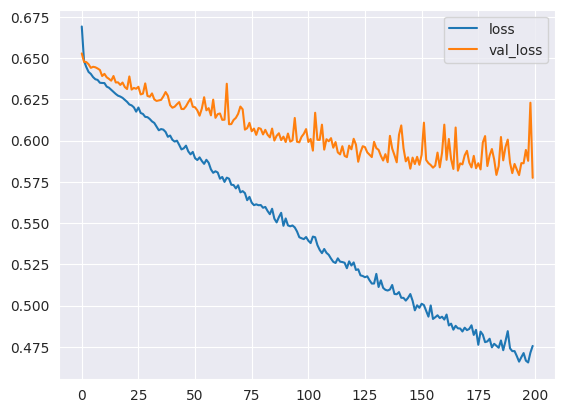

In [52]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot() #over fitting

In [56]:
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype('int32')

print(
    confusion_matrix(y_test, predicted_classes),
    '\n',
    classification_report(y_test, predicted_classes)
)


151/151 [==============================] - 0s 1ms/step
[[1779  658]
 [ 683 1707]] 
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      2437
           1       0.72      0.71      0.72      2390

    accuracy                           0.72      4827
   macro avg       0.72      0.72      0.72      4827
weighted avg       0.72      0.72      0.72      4827



The model achieved an overall accuracy of approximately 72%, with a precision of 72% and recall of 73% for class 0 (not fully paid), and a precision of 72% and recall of 71% for class 1 (fully paid). Despite a balanced performance between the two classes, there were 683 false negatives, indicating room for improvement in correctly identifying fully paid loans."

**Model Refinement**

In [58]:
model_new = Sequential()

model_new.add(
        Dense(94, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(30, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(15, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train,
        y_train,
        epochs=200,
        batch_size=256,
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 2s 20ms/step - loss: 0.6824 - binary_accuracy: 0.5579 - val_loss: 0.6623 - val_binary_accuracy: 0.6145
Epoch 2/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6634 - binary_accuracy: 0.6033 - val_loss: 0.6541 - val_binary_accuracy: 0.6136
Epoch 3/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6577 - binary_accuracy: 0.6151 - val_loss: 0.6518 - val_binary_accuracy: 0.6124
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6541 - binary_accuracy: 0.6159 - val_loss: 0.6504 - val_binary_accuracy: 0.6066
Epoch 5/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6518 - binary_accuracy: 0.6162 - val_loss: 0.6477 - val_binary_accuracy: 0.6219
Epoch 6/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6508 - binary_accuracy: 0.6208 - val_loss: 0.6462 - val_binary_accuracy: 0.6217
Epoch 7/200
44/44 [==============================] - 0s 5ms/step - lo

<Axes: >

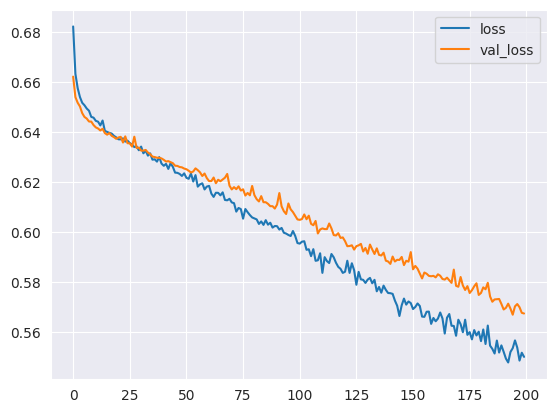

In [59]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() #The graph shows that, by adding in Dropout layers, we have reduced the overfitting issue compared with the old model


Compared to the old model, overfitting issue have been reduced by adding in dropout layers

In [61]:
predictions_new = (model_new.predict(X_test) >= 0.2).astype('int')

print(
    confusion_matrix(y_test, predictions_new),
    '\n',
    classification_report(y_test, predictions_new)
)


151/151 [==============================] - 1s 5ms/step
[[ 490 1947]
 [  31 2359]] 
               precision    recall  f1-score   support

           0       0.94      0.20      0.33      2437
           1       0.55      0.99      0.70      2390

    accuracy                           0.59      4827
   macro avg       0.74      0.59      0.52      4827
weighted avg       0.75      0.59      0.52      4827



By changing the cut-off line to 0.2 from 0.5, we have dramatically brought down the Type 2 error.

**Saving the model and scalar.**

In [62]:
dump(scaler, open('scaler.pkl', 'wb'))
model_new.save('my_model_lending_club.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model Use Case**

In [63]:
later_scaler = load(open('scaler.pkl', 'rb'))
later_model = load_model('my_model_lending_club.h5')



In [64]:
X_OOT = to_pred.drop('not.fully.paid', axis=1).values
to_pred.drop('not.fully.paid', axis=1).values

print(X_OOT.shape)

(0, 15)
